In [1]:
%%HTML
<!-- Mejorar visualización en proyector -->
<style>
.rendered_html {font-size: 1.2em; line-height: 150%;}
div.prompt {min-width: 0ex; }
.container {width:95% !important;}
</style>

<h1 style="text-align:center">Clase 12: Analizar datos de excitación sísmica </h1>
<h3 style="text-align:center">ACUS262: Aislamiento y Análisis de Vibraciones</h3>
<p style="text-align:center">Dr. Víctor Poblete <br>
<a href="mailto:vpoblete@uach.cl">vpoblete@uach.cl</a><br>
<a href="https://github.com/vpobleteacustica/ACUS262-Aislamiento-y-analisis-de-vibraciones">https://github.com/vpobleteacustica/ACUS262-Aislamiento-y-analisis-de-vibraciones</a><br> 
<a href="http://www.acusticauach.cl">www.acusticauach.cl</a><br>

### Importar módulos necesarios 

In [8]:
from obspy.core import UTCDateTime
from obspy.clients.fdsn import Client
from obspy import read
import matplotlib.pyplot as plt
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
%matplotlib notebook
import numpy as np
import obspy.signal
import math


### Visualización formas de ondas y espectrogramas de eventos sísmicos ocurridos en Chile
+ [Seleccionemos el terremoto de Chile, M8.8, de Febrero 27 de 2010](http://www.adc1.iris.edu/ds/newsletter/vol12/no1/63/february-2010-m88-chile-quake/)

### Definir proveedor de datos: 
+ Para descargar la información sísmica debemos usar una fuente proveedora de datos. 
+ Seteamos IRIS como nuestro proveedor de datos: [IRIS](https://www.iris.edu/hq/).
+ Existen otros proveedores, [ver por ejemplo](https://docs.obspy.org/packages/obspy.clients.fdsn.html), 

In [9]:
client = Client(
   "IRIS"
)

### Seleccionar red:

+ Podemos seleccionar una red sísmica de la cual descargar los datos. 


In [10]:
net  = "C"    # código de red sismológica nacional: ver listado de redes en: http://ears.iris.washington.edu/networkList.html
sta  = "*"     # código de estación y seleccionamos todas las estaciones
loc  = "*"     # seleccionamos todas las locaciones disponibles para esa estacion
chan = "*"    # seleccionamos todas los canales

### Especificar el tiempo de ocurrencia del evento
+ El evento sísmico lo especificamos usando el rango de tiempo en que ocurre el evento. La librería Obspy usa tiempo universal [UTCDateTime](https://docs.obspy.org/tutorial/code_snippets/utc_date_time.html).
+ Definimos el tiempo del sismo, luego vamos a especificar tiempo de onset y tiempo de offset de las formas de onda que se descargarán.
+ Para ilustrar, definamos que queremos descargar formas de ondas desde 1 minuto antes del tiempo de onset y 15 minutos después del tiempo de offset.


In [11]:
tiempo_M8_8_Chile = "2010-02-27T06:34:17.000" 
eventTime         = UTCDateTime(tiempo_M8_8_Chile)
starttime         = eventTime - 60                   # 1 minuto antes del evento
endtime           = eventTime + 15 * 60                # 15 minutos después del evento

### Descargamos las formas de onda y las almacenamos en objetos tipo *Stream*
+ Un stream es un objeto tipo lista que contiene múltiples objetos tipo *Traza*.
+ Estas trazas son series de tiempo continuas y contienen información de *meta-data*


In [12]:
myStream = client.get_waveforms(net, sta, loc, chan, starttime, endtime)

### Listamos todas las trazas disponibles: 

In [13]:
print(myStream.__str__(extended = True)) 

15 Trace(s) in Stream:
C.CL2C..BHE   | 2010-02-27T06:33:17.000000Z - 2010-02-27T06:49:17.000000Z | 50.0 Hz, 48001 samples
C.CL2C..BHN   | 2010-02-27T06:33:17.000000Z - 2010-02-27T06:49:17.000000Z | 50.0 Hz, 48001 samples
C.CL2C..BHZ   | 2010-02-27T06:33:17.000000Z - 2010-02-27T06:49:17.000000Z | 50.0 Hz, 48001 samples
C.NICH..SHE   | 2010-02-27T06:33:17.002900Z - 2010-02-27T06:37:04.231776Z | 50.0 Hz, 11362 samples
C.NICH..SHN   | 2010-02-27T06:33:17.002900Z - 2010-02-27T06:37:04.231776Z | 50.0 Hz, 11362 samples
C.NICH..SHZ   | 2010-02-27T06:33:17.002900Z - 2010-02-27T06:37:04.231776Z | 50.0 Hz, 11362 samples
C.PEL1..BHE   | 2010-02-27T06:33:17.000000Z - 2010-02-27T06:49:17.000000Z | 50.0 Hz, 48001 samples
C.PEL1..BHN   | 2010-02-27T06:33:17.000000Z - 2010-02-27T06:49:17.000000Z | 50.0 Hz, 48001 samples
C.PEL1..BHZ   | 2010-02-27T06:33:17.000000Z - 2010-02-27T06:49:17.000000Z | 50.0 Hz, 48001 samples
C.PSCH.00.SHE | 2010-02-27T06:33:17.000000Z - 2010-02-27T06:49:17.000000Z | 50.0 Hz, 4

### Guardamos en nuestro disco el dataset en formato SAC (Seismic Analysis Code): 

In [14]:
myStream.write('C_CL2C_BHZ.SAC', format = 'SAC')

### Leer un archivo SAC para analizar su información:

In [15]:
filename = 'C_CL2C_BHZ01.SAC'
my_st = read(filename, debug_headers = True)

### Meta-data de la traza: 

In [16]:
# Analizamos la traza 0.
print(my_st[0].stats)  #estadisticas

         network: C
         station: CL2C
        location: 
         channel: BHE
       starttime: 2010-02-27T06:33:17.000000Z
         endtime: 2010-02-27T06:49:17.000000Z
   sampling_rate: 50.0
           delta: 0.02
            npts: 48001
           calib: 1.0
         _format: SAC
             sac: AttribDict({'delta': 0.02, 'depmin': -8192000.0, 'depmax': 8173387.0, 'scale': 1.0, 'odelta': -12345.0, 'b': 0.0, 'e': 960.0, 'o': -12345.0, 'a': -12345.0, 'internal0': -12345.0, 't0': -12345.0, 't1': -12345.0, 't2': -12345.0, 't3': -12345.0, 't4': -12345.0, 't5': -12345.0, 't6': -12345.0, 't7': -12345.0, 't8': -12345.0, 't9': -12345.0, 'f': -12345.0, 'resp0': -12345.0, 'resp1': -12345.0, 'resp2': -12345.0, 'resp3': -12345.0, 'resp4': -12345.0, 'resp5': -12345.0, 'resp6': -12345.0, 'resp7': -12345.0, 'resp8': -12345.0, 'resp9': -12345.0, 'stla': -12345.0, 'stlo': -12345.0, 'stel': -12345.0, 'stdp': -12345.0, 'evla': -12345.0, 'evlo': -12345.0, 'evel': -12345.0, 'evdp': -12345.0, 'mag

### Plotear los datos: 

<IPython.core.display.Javascript object>


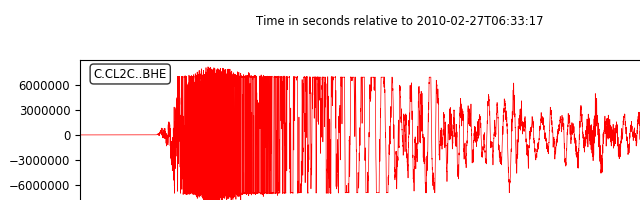

In [17]:
my_st.plot(
    outfile         = "my_st_relative.png",
    starttime       = None,
    endtime         = None,
    size            = (800, 250),
    dpi             = 100,
    color           = "red",
    bgcolor         = "white",
    face_color      = "white",
    transparent     = False,
    number_of_ticks = 6,
    tick_rotation   = 45,
    type            = "relative",
    linewidth       = 0.5,
    linestyle       = "-",
    
)

<IPython.core.display.Javascript object>


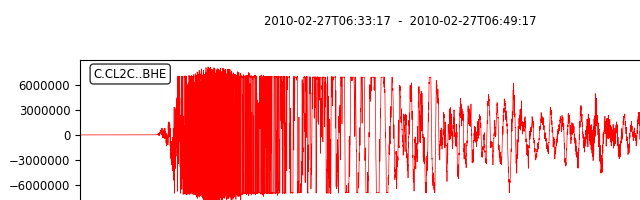

In [18]:
my_st.plot(
    outfile         = "my_st_normal.png",
    starttime       = None,
    endtime         = None,
    size            = (800, 250),
    dpi             = 100,
    color           = "red",
    bgcolor         = "white",
    face_color      = "white",
    transparent     = False,
    number_of_ticks = 6,
    tick_rotation   = 45,
    type            = "normal",
    linewidth       = 0.5,
    linestyle       = "-",
    
)

### Seleccionamos las muestras de la traza: 

48001


<IPython.core.display.Javascript object>


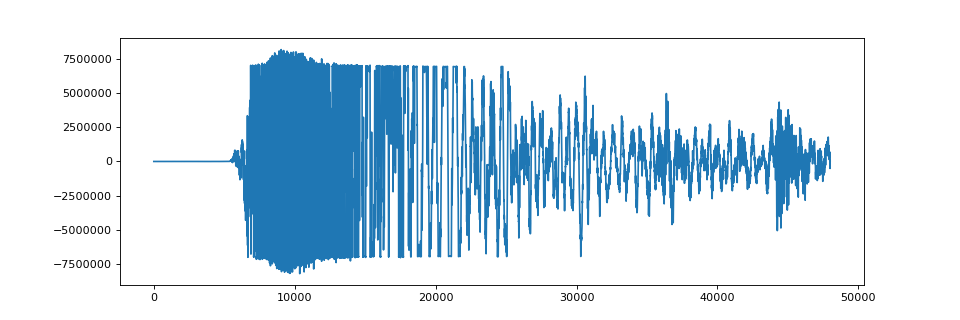

In [19]:
my_tr = my_st[0]

my_tr_samples = my_tr.data
print(len(my_tr_samples))
fig = plt.figure(figsize=(12,4))
plt.plot(my_tr_samples, label='linear')


### Duración en tiempo de la traza: 

In [20]:
horas_chile = (my_tr.stats.endtime - my_tr.stats.starttime)/60
print('El archivo SAC leído tiene una duración de %d minutos' % (horas_chile))

El archivo SAC leído tiene una duración de 16 minutos


### Cambiar de muestras a segundos: 

<IPython.core.display.Javascript object>


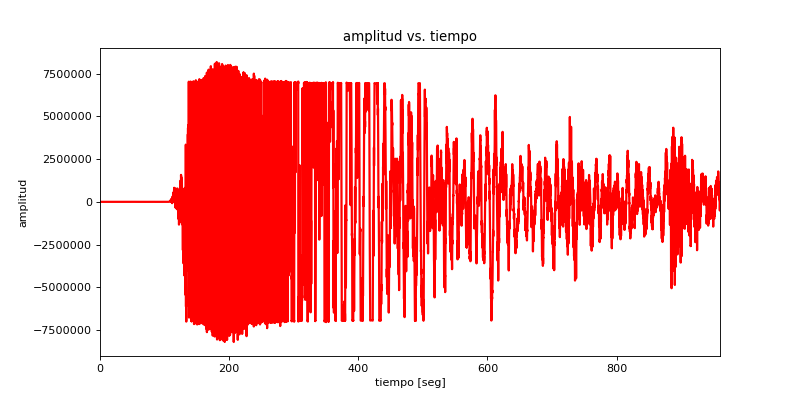

Text(0, 0.5, 'amplitud')

In [49]:
sr    = my_tr.stats.sampling_rate
largo = len(my_tr)                          # número total de muestras
t     = np.linspace(0, largo/sr, largo) 

fig = plt.figure(figsize=(10,5))
plt.title('amplitud vs. tiempo') 
plt.plot(t, my_tr, color = 'red', linewidth = 2)
plt.xlim(0, largo/sr)
plt.xlabel('tiempo [seg]')
plt.ylabel('amplitud')


### Espectrograma de la traza 

<IPython.core.display.Javascript object>


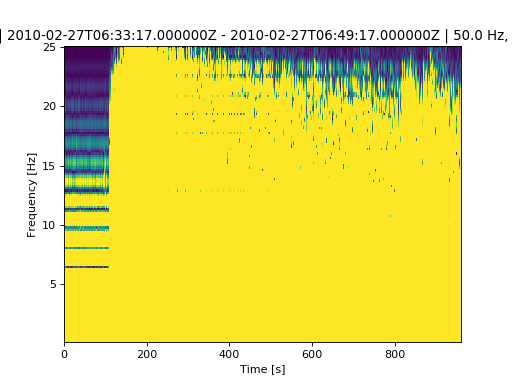

(0.0, 6479157.0547526451)


In [35]:
fig = my_tr.spectrogram(show=False)
ax  = fig.axes[0]
im  = ax.images[0]
print(im.get_clim())
im.set_clim(vmax = 100)
plt.show()

### Envolvente 

<IPython.core.display.Javascript object>


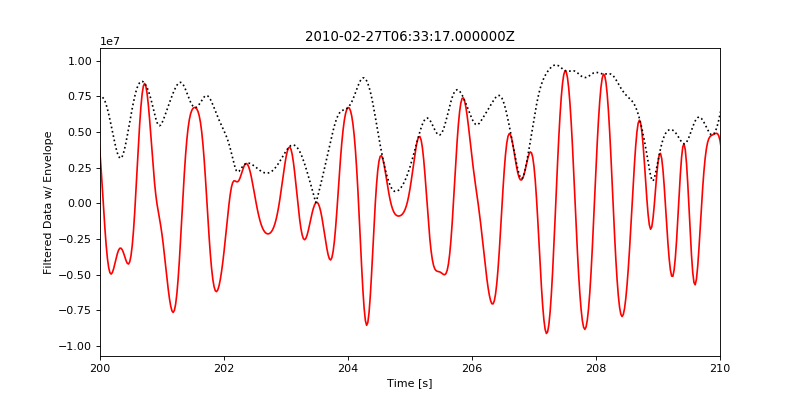

In [23]:
npts =  my_st[0].stats.npts
samprate = my_st[0].stats.sampling_rate

# Filtering the Stream object
myStream_filt = my_st.copy()

myStream_filt.filter('bandpass', freqmin=1, freqmax=3, corners=2, zerophase=True)

# Envelope of filtered data
data_envelope = obspy.signal.filter.envelope(myStream_filt[0].data)

# The plotting, plain matplotlib
fig = plt.figure(figsize=(10,5))
t = np.arange(0, npts / samprate, 1 / samprate)
plt.plot(t, myStream_filt[0].data, 'r')
plt.plot(t, data_envelope, 'k:')
plt.title(myStream[0].stats.starttime)
plt.ylabel('Filtered Data w/ Envelope')
plt.xlabel('Time [s]')
plt.xlim(200, 210)
plt.show()


### Información del evento:

In [25]:
cat = client.get_events(starttime=starttime, endtime=endtime,
                        minmagnitude=8.8, catalog="ISC")

print(cat)


1 Event(s) in Catalog:
2010-02-27T06:34:13.330000Z | -36.148,  -72.933 | 8.8 MW


### Información de la estación

In [27]:
inventory = client.get_stations(network = net, station="*",
                                starttime=starttime,
                                endtime=endtime)
print(inventory)

Inventory created at 2020-12-02T02:35:51.000000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.47
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2010-02-27...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			C
		Stations (15):
			C.AGCH (Angol, Chile)
			C.ANTU (Antumapu)
			C.CHUE (Copihue, Chile)
			C.CL2C (Cerro Calan, Chile)
			C.CLCH (Cerro Calan)
			C.COYC (Coyhaique, Chile)
			C.FSR (Falla de San Ramon)
			C.IHA (Valparaiso, Chile)
			C.LACH (Colegio Las Americas, Santiago, Chile)
			C.NICH (Los Niches, Curico, Chile)
			C.PEL1 (Peldehue, Chile)
			C.PSCH (Chilean National Seismic Network)
			C.RCDM (CSN)
			C.SJCH (San Jose de Maipo, Chile)
			C.STL (Santa Lucia)
		Channels (0):



### Downsampling, filtrados y plotear espectrograma 

In [47]:
st_filtrado = my_st.copy()
st_filtrado.detrend(type = 'demean')
st_filtrado.detrend(type = 'linear')
st_filtrado.filter('highpass', freq = 8) # estos valores en duro fueron obtenidos con Jorge al visualizar en Cool Edit la señal
st_filtrado.filter('lowpass', freq = 1)   # estos valores en duro fueron obtenidos con Jorge al visualizar en Cool Edit la señal 
st_filtrado.decimate(2)
print(st_filtrado[0].stats) 

         network: C
         station: CL2C
        location: 
         channel: BHE
       starttime: 2010-02-27T06:33:17.000000Z
         endtime: 2010-02-27T06:49:17.000000Z
   sampling_rate: 25.0
           delta: 0.04
            npts: 24001
           calib: 1.0
         _format: SAC
      processing: ["ObsPy 1.2.2: detrend(options={}::type='demean')", "ObsPy 1.2.2: detrend(options={}::type='linear')", "ObsPy 1.2.2: filter(options={'freq': 8}::type='highpass')", "ObsPy 1.2.2: filter(options={'freq': 1}::type='lowpass')", "ObsPy 1.2.2: filter(options={'freq': 12.5, 'maxorder': 12}::type='lowpass_cheby_2')", 'ObsPy 1.2.2: decimate(factor=2::no_filter=False::strict_length=False)']
             sac: AttribDict({'delta': 0.02, 'depmin': -8192000.0, 'depmax': 8173387.0, 'scale': 1.0, 'odelta': -12345.0, 'b': 0.0, 'e': 960.0, 'o': -12345.0, 'a': -12345.0, 'internal0': -12345.0, 't0': -12345.0, 't1': -12345.0, 't2': -12345.0, 't3': -12345.0, 't4': -12345.0, 't5': -12345.0, 't6': -12345.0,

<IPython.core.display.Javascript object>


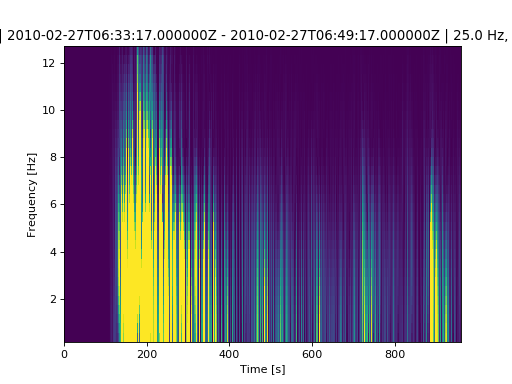

(1.1881598174282024e-08, 1043.7802504999847)


In [48]:
fig = st_filtrado[0].spectrogram(show=False)
ax  = fig.axes[0]
im  = ax.images[0]
print(im.get_clim())
im.set_clim(vmax = 100)
plt.show()